In [ ]:
import pandas as pd

# Load the dataset
file_path = r'E:\study\internship\All_the_Intermediate_Colleges_in_Pakistan.csv'
data = pd.read_csv(file_path)


print("Initial Dataset Info:")
print(data.info())


In [ ]:
# Step 1: Handle Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing values in 'Affiliation' with 'Unknown' and 'Rating' with the mode
data['Affiliation'].fillna('Unknown', inplace=True)
data['Rating'].fillna(data['Rating'].mode()[0], inplace=True)


In [5]:
# Step 2: Correct Data Types

data['Rating'] = data['Rating'].astype(str).str.replace('*', '').astype(float).round().astype(int)


In [6]:
# Step 3: Remove Duplicates
data.drop_duplicates(inplace=True)


In [7]:
# Step 4: Normalize Data
data['Name'] = data['Name'].str.strip().str.lower()
data['Location'] = data['Location'].str.strip().str.lower()
data['Study Program'] = data['Study Program'].str.strip().str.lower()
data['Sector'] = data['Sector'].str.strip().str.lower()
data['Affiliation'] = data['Affiliation'].str.strip().str.lower()


In [8]:
# Step 5: Handle Special Characters

data['Name'] = data['Name'].str.replace(r'[^\w\s]', '', regex=True)


In [9]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
            Rating
count  1630.000000
mean      1.113497
std       1.825406
min       0.000000
25%       0.000000
50%       0.000000
75%       2.000000
max       5.000000


In [10]:
# Value counts for categorical variables
print("\nValue Counts:")
print(data['Affiliation'].value_counts())



Value Counts:
Affiliation
unknown                                                                             1475
university of sargodha                                                                 7
university of punjab                                                                   6
bise lahore \n university of the punjab lahore                                         6
university of the punjab lahore \n bise lahore                                         5
                                                                                    ... 
karachi university                                                                     1
islamia university bahawalpur                                                          1
gc university faisalabad                                                               1
board of intermediate and secondary education \n university of the punjab lahore       1
punjab university                                                                  

C:\Users\SOHAIB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


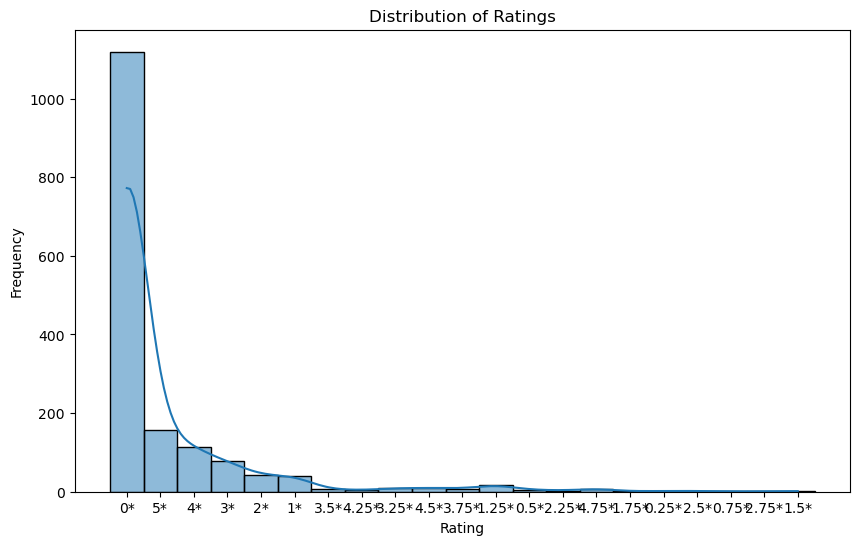

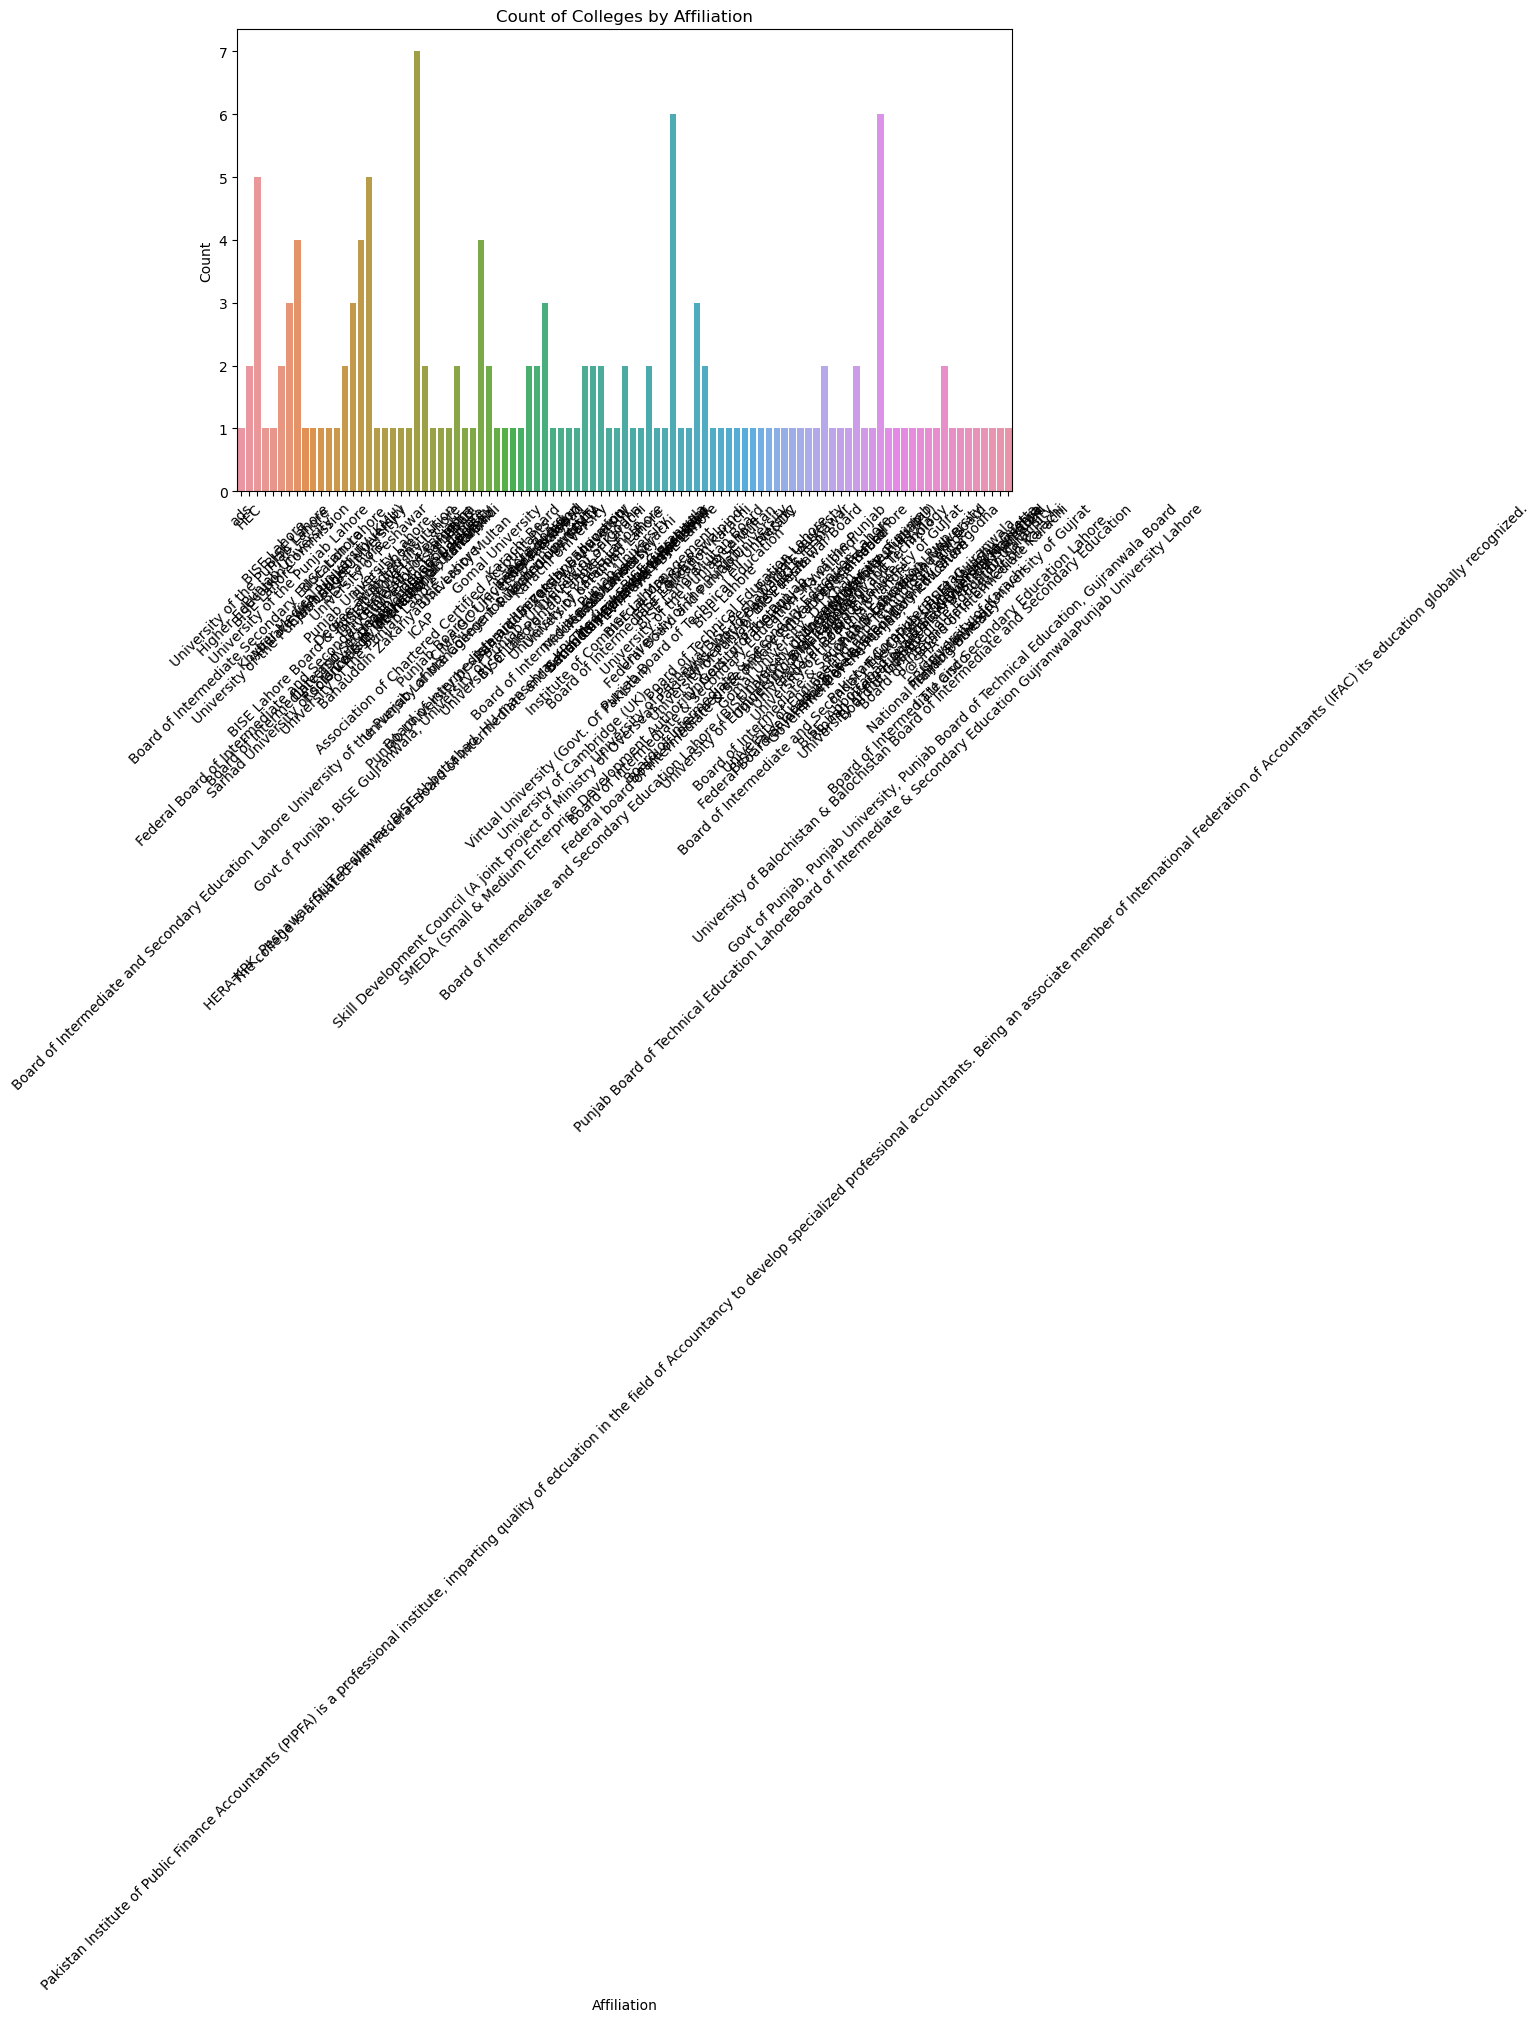

ValueError: No variables found for grid columns.

In [2]:
#visulaization / identifying performance trends 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Affiliation', data=data)
plt.xticks(rotation=45)
plt.title('Count of Colleges by Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Count')
plt.show()

sns.pairplot(data, hue='Sector', height=3)
plt.suptitle('Pairwise Relationships by Sector', y=1.02)
plt.show()


In [13]:
from scipy.stats import ttest_ind
# t test to identify performance trends 
# Statistical test : T-test for 'Rating' between different sectors
sectors = data['Sector'].unique()
for sector in sectors:
    subset = data[data['Sector'] == sector]['Rating']
    print(f"\nT-test for Sector '{sector}' vs. All:")
    t_statistic, p_value = ttest_ind(subset, data['Rating'])
    print(f"T-statistic: {t_statistic}, p-value: {p_value}")



T-test for Sector 'private' vs. All:
T-statistic: 1.3661916029102181, p-value: 0.17201909633123633

T-test for Sector 'public' vs. All:
T-statistic: -1.5516662962062004, p-value: 0.12088811524377328

T-test for Sector 'nan' vs. All:
T-statistic: nan, p-value: nan


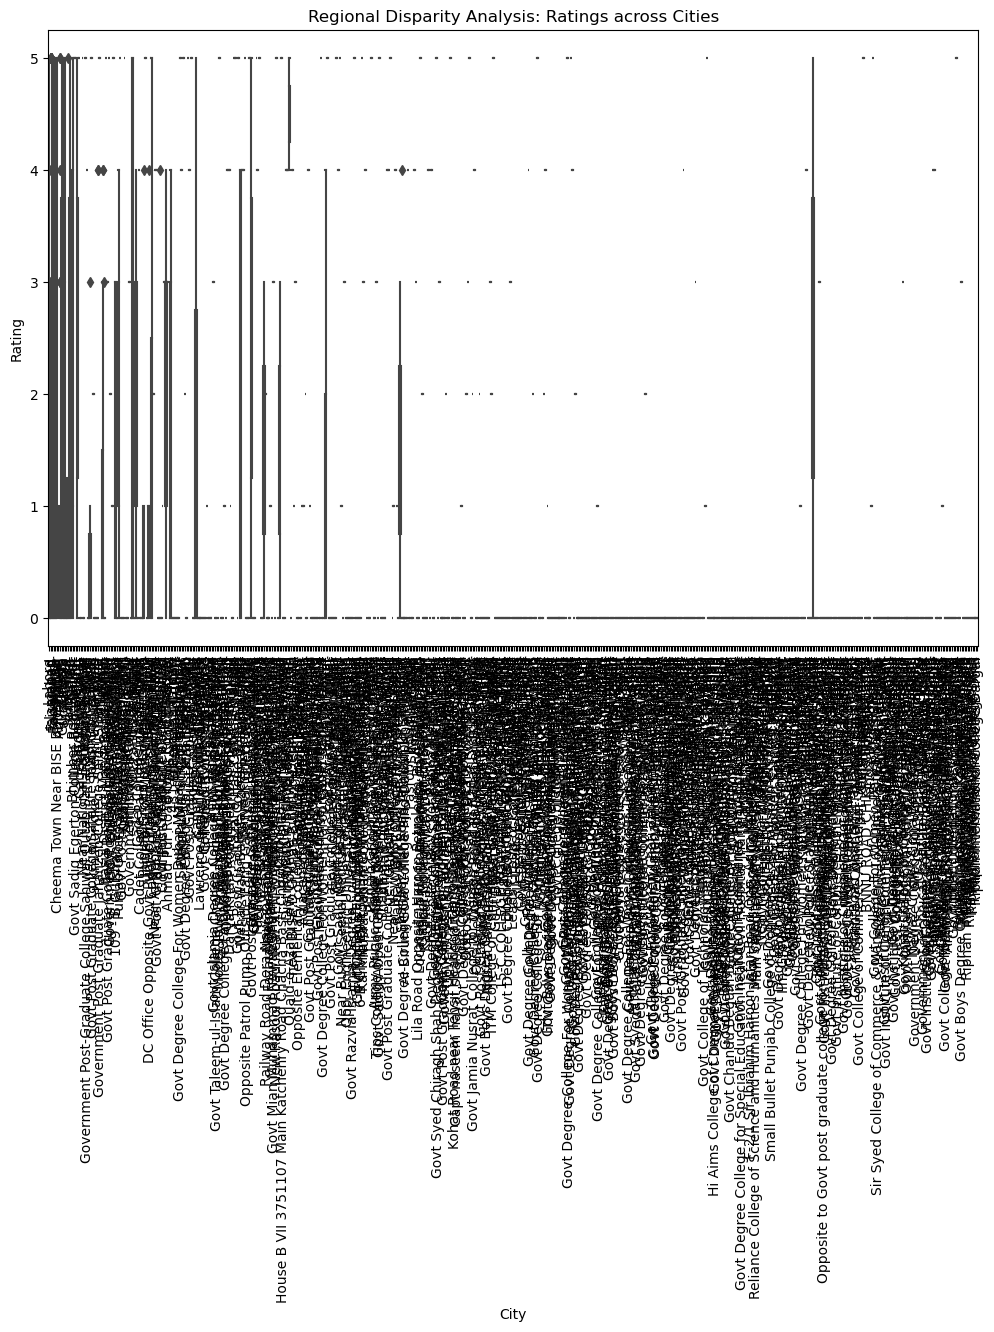

ANOVA results: F-statistic = 0.9306312367828211, p-value = 0.8351109388053368
There are no significant differences in ratings between cities.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import f_oneway
# Load the dataset
file_path = r'E:\study\internship\All_the_Intermediate_Colleges_in_Pakistan.csv'
data = pd.read_csv(file_path)

# Ensure the Location column is treated as string
data['Location'] = data['Location'].astype(str)

# Function to extract city names based on common patterns
def extract_city(location):
    # Define a list of known cities for better extraction
    known_cities = ['Lahore', 'Islamabad', 'Faisalabad', 'Rawalpindi', 'Multan', 'Peshawar', 'Quetta', 'Gujranwala', 'Karachi', 'Abbottabad']
    for city in known_cities:
        if re.search(rf'\b{city}\b', location, re.IGNORECASE):
            return city
    # Fall back to the last part of the address if no known city is found
    return location.split(',')[-1].strip()

# Apply the function to extract city names
data['City'] = data['Location'].apply(extract_city)

# Clean the Rating column by removing any non-numeric characters and converting to float
data['Rating'] = data['Rating'].str.extract('(\d+)').astype(float)

# Check the unique cities to ensure extraction is correct
unique_cities = data['City'].unique()

# Plotting the boxplot after data cleaning
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Rating', data=data)
plt.title('Regional Disparity Analysis: Ratings across Cities')
plt.xlabel('City')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

unique_cities
# Statistical Comparison using ANOVA
# Group ratings by city
city_groups = [group['Rating'].values for name, group in data.groupby('City')]

# Perform ANOVA
f_statistic, p_value = f_oneway(*city_groups)

print(f'ANOVA results: F-statistic = {f_statistic}, p-value = {p_value}')

# Interpretation of ANOVA results
if p_value < 0.05:
    print("There are significant differences in ratings between cities.")
else:
    print("There are no significant differences in ratings between cities.")

C:\Users\SOHAIB\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\SOHAIB\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\SOHAIB\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


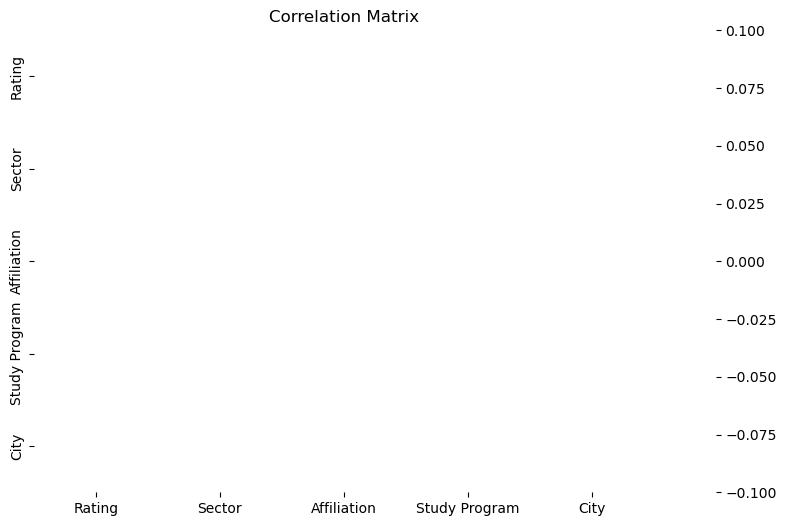

Error: X or y is empty. Cannot fit the model.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, pearsonr
import statsmodels.api as sm
import numpy as np

# Load the dataset
file_path = r'E:\study\internship\All_the_Intermediate_Colleges_in_Pakistan.csv'
data = pd.read_csv(file_path)

# Clean and preprocess the data
data['City'] = data['Location'].str.split().str[0]
data = data.dropna(subset=['Rating'])  # Drop rows with missing 'Rating' values
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')  # Convert 'Rating' to numeric
data = data.dropna(subset=['Rating'])  # Drop rows with non-numeric 'Rating' values

# Encode categorical variables
data['Sector'] = data['Sector'].astype('category').cat.codes
data['Affiliation'] = data['Affiliation'].astype('category').cat.codes
data['Study Program'] = data['Study Program'].astype('category').cat.codes
data['City'] = data['City'].astype('category').cat.codes

# Correlation Analysis
correlation_matrix = data[['Rating', 'Sector', 'Affiliation', 'Study Program', 'City']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Regression Analysis
X = data[['Sector', 'Affiliation', 'Study Program', 'City']]
y = data['Rating']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Drop any rows with NaN or infinite values in X or y
mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y) & ~np.isinf(X).any(axis=1) & ~np.isinf(y)
X = X[mask]
y = y[mask]

if X.shape[0] > 0 and y.shape[0] > 0:
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    print(model.summary())
    
    # Plotting residuals
    plt.figure(figsize=(10, 6))
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'ed', 'lw': 2})
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()
else:
    print("Error: X or y is empty. Cannot fit the model.")